# Image Intensity Transformations

Images are stored as pixels values, each pixel value represents a color intensity value. Histograms are frequency distribution of these intensity values that occur in an image.

#### Histograms

In [1]:
from skimage import io

/Users/gadosey/opt/anaconda3/envs/CVclass/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


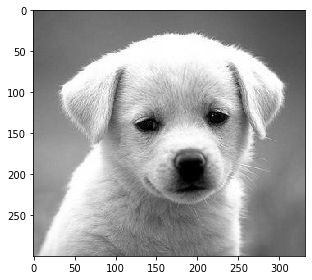

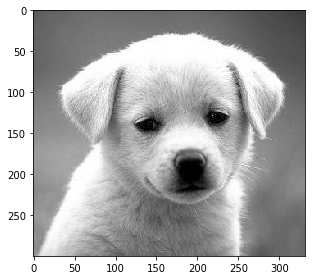

In [2]:
input_image = 'dog.jpeg'

image_color = io.imread(input_image)
io.imshow(image_color); io.show()

gray_image= io.imread(input_image, as_gray=True)
io.imshow(gray_image); io.show()

### Inspecting Image histograms

#### Grayscale

In [3]:
import matplotlib.pyplot as plt

NumPy provides a function called ravel that is used to decompose n-dimensional arrays into 1D arrays. 

In [4]:
print(f"Image shape: {gray_image.shape} and size: {gray_image.size}")
print(f"Un'ravel'ed shape: {gray_image.ravel().shape} and size: {gray_image.ravel().size}")

Image shape: (300, 332) and size: 99600
Un'ravel'ed shape: (99600,) and size: 99600


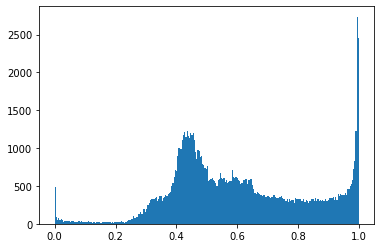

In [5]:
ax = plt.hist(gray_image.ravel(), bins=256)
plt.show()

#### Colour

In [6]:
from functools import partial

In [7]:
red = image_color[:, :, 0]
green = image_color[:, :, 1]
blue = image_color[:, :, 2]   

Text(0.5, 1.0, 'Histogram')

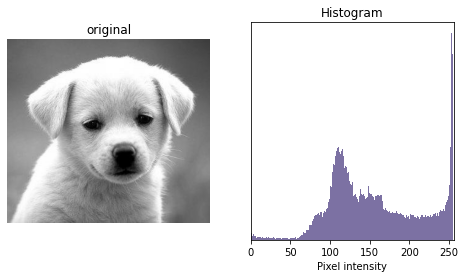

In [8]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches((8, 4))

# Display image
ax_img, ax_hist = axes
ax_img.imshow(image_color)
ax_img.set_title('original')
ax_img.set_axis_off()

#Dispaly Hist
ax_img, ax_hist = axes
plot_hist = partial(ax_hist.hist, bins=256, linewidth=2, alpha=0.3, density=True)
plot_hist(red.ravel(), color='red')
plot_hist(green.ravel(), color='green')
plot_hist(blue.ravel(), color='blue')
ax_hist.set_xlabel('Pixel intensity')
ax_hist.set_xlim(0, 256)
ax_hist.set_yticks([])
ax_hist.set_title('Histogram')

The parameter bins determines the number of “bins” to use for the histogram. We pass in 256 because we want to see the pixel count for each of the 256 possible values in the grayscale image.

#### Invert image

In [9]:
from skimage import util

In [10]:
inverted_img = util.invert(gray_image)

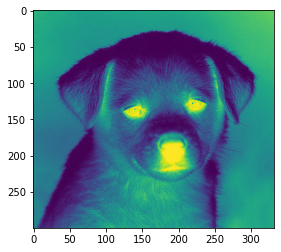

In [11]:
plt.imshow(inverted_img)

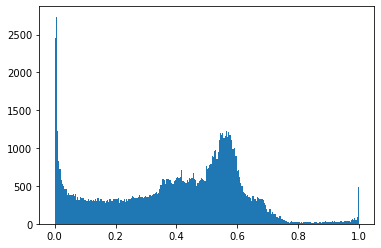

In [12]:
ax = plt.hist(inverted_img.ravel(), bins=256)
plt.show()

#### Thresholding

Thresholding is an integral part of almost any quantitative image processing workflow. let’s assume that we want to show where a threshold of 50% would fall on our histogram. NumPy has a function perfect for this called percentile. Let’s set a variable representing the median to the 50th percentile of our image:

In [15]:
import numpy as np

In [16]:
approx_median = np.percentile(gray_image, 50)

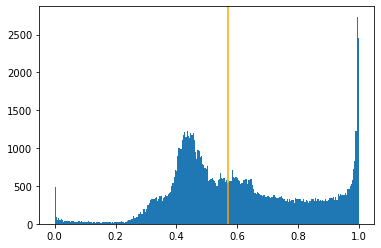

In [17]:
ax = plt.hist(gray_image.ravel(), bins=256)
plt.axvline(approx_median, color='orange')
plt.show()

#### Contrast Stretching

In [22]:
from skimage import exposure

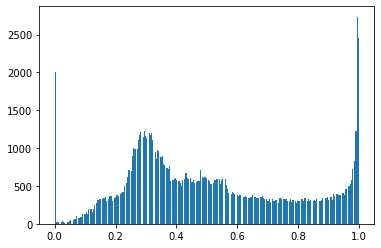

In [23]:
# Contrast stretching
p2, p98 = np.percentile(gray_image, (2, 98))
img_rescale = exposure.rescale_intensity(gray_image, in_range=(p2, p98))
ax = plt.hist(img_rescale.ravel(), bins=256)
plt.show()

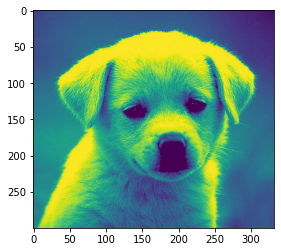

In [24]:
plt.imshow(img_rescale)

### gamma correction

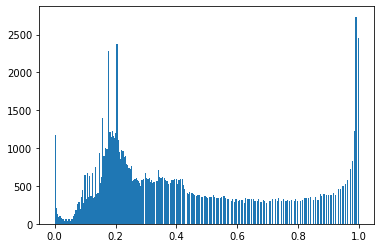

In [25]:
gamma_corrected_2 = exposure.adjust_gamma(gray_image, 2.0)
ax = plt.hist(gamma_corrected_2.ravel(), bins=256)
plt.show()

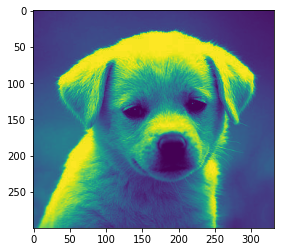

In [26]:
plt.imshow(gamma_corrected_2)

#### Histogram Equalization

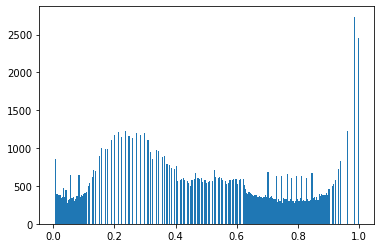

In [31]:
img_eq = exposure.equalize_hist(gray_image)
ax = plt.hist(img_eq.ravel(), bins=256)
plt.show()

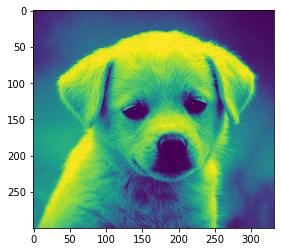

In [32]:
plt.imshow(img_eq)